<a href="https://colab.research.google.com/github/PriyankaSharma0925/Tensorflow/blob/main/Evaluating_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X=tf.range(-100,100,5)
X

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [3]:
len(X)

40

In [4]:
y=X+10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

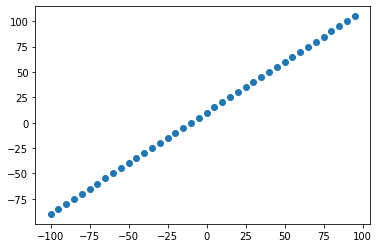

In [5]:
plt.scatter(X,y)


In [6]:
X_train=X[:30]

X_test=X[30:]

len(X_train),len(X_test),X_test



(30,
 10,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95], dtype=int32)>)

In [7]:
y_train=y[:30]
y_test=y[30:]

len(y_train),len(y_test),y_test


(30,
 10,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>)

Visualizing the data


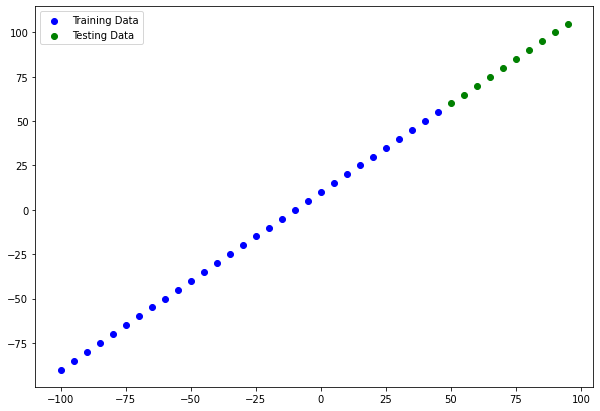

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b", label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Testing Data")
plt.legend()


In [9]:
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(15,input_shape=[1],name="AAA"),
     tf.keras.layers.Dense(1)]
)
    
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AAA (Dense)                 (None, 15)                30        
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [12]:
from tensorflow.keras.utils import plot_model

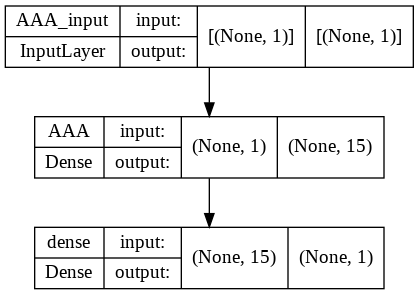

In [13]:
plot_model(model=model,show_shapes=True)

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred

array([[29.786629],
       [32.67751 ],
       [35.568382],
       [38.459263],
       [41.350136],
       [44.24101 ],
       [47.13189 ],
       [50.022766],
       [52.913643],
       [55.80452 ]], dtype=float32)

In [16]:
tf.shape(y_pred)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  1], dtype=int32)>

In [17]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

In [18]:
tf.squeeze(y_pred)
tf.shape(y_pred)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  1], dtype=int32)>

In [19]:
y_pred

array([[29.786629],
       [32.67751 ],
       [35.568382],
       [38.459263],
       [41.350136],
       [44.24101 ],
       [47.13189 ],
       [50.022766],
       [52.913643],
       [55.80452 ]], dtype=float32)

In [20]:
def plot_prediction_graph(X_train,X_test,y_train,y_test,y_pred):
  train_data=X_train
  test_data=X_test
  train_label=y_train
  test_label=y_test
  prediction=y_pred
  plt.scatter(train_data,train_label,c="b", label="Training Data")
  plt.scatter(test_data,test_label,c="g", label="Testing Data")
  plt.scatter(test_label,prediction,label="Pridiction data")
  plt.legend()


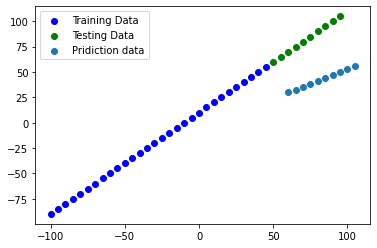

In [21]:
plot_prediction_graph(X_train,X_test,y_train,y_test,y_pred)

In [22]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 135ms/step - loss: 39.7044 - mae: 39.7044


[39.70442581176758, 39.70442581176758]

In [23]:
tf.keras.losses.mae(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.71337 , 49.82249 , 46.931618, 44.040737, 41.149864, 38.25899 ,
       35.36811 , 32.477234, 29.586359, 26.69548 ], dtype=float32)>

In [24]:
# Remove the one dimension from the y_pred

tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.786629, 32.67751 , 35.568382, 38.459263, 41.350136, 44.24101 ,
       47.13189 , 50.022766, 52.913643, 55.80452 ], dtype=float32)>

In [25]:
tf.keras.losses.mae(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=39.704426>

In [26]:
tf.shape(y_pred)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  1], dtype=int32)>

In [27]:
tf.keras.losses.mse(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1613.1407>

In [28]:
def evaluation(y_test,y_pred,method):
  test_label=y_test
  prediction=y_pred
  if method=="mae":
    return tf.keras.losses.mae(test_label,tf.squeeze(prediction)).numpy()
  elif method=="mse":
    return tf.keras.losses.mse(test_label,tf.squeeze(prediction)).numpy()
  else:
    print("Only supports MAE and MSE evaluation matrix")  




In [29]:
evaluation(y_test,y_pred,"mae")

39.704426

In [30]:
evaluation(y_test,y_pred,"mse")

1613.1407

In [31]:
evaluation(y_test,y_pred,"mjjjae")

Only supports MAE and MSE evaluation matrix


In [32]:
model1=tf.constant(range(0,100,4))

In [33]:
model1

<tf.Tensor: shape=(25,), dtype=int32, numpy=
array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

Experimenting with different parameters. 
First try with model_1 with 1 Dense layer with 1 unit and 100 epochs.

In [34]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]

)

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 16.1727 - mae: 16.1727
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9481 - mae: 8.9481
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7873 - mae: 11.7873
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1375 - mae: 11.1375
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1108 - mae: 9.1108
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9505 - mae: 11.9505
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2481 - mae: 8.2481
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9378 - mae: 11.9378
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2448 - mae: 8.2448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9252 - mae: 11.9252
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [35]:
y_predict_1=model_1.predict(X_test)

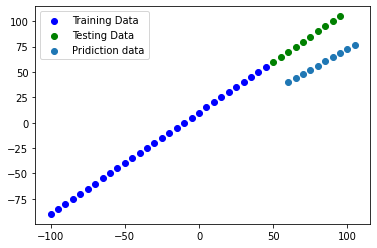

In [36]:
plot_prediction_graph(X_train,X_test,y_train,y_test,y_predict_1)

In [37]:
mae_1=evaluation(y_test,y_predict_1,"mae")

In [38]:
mse_1=evaluation(y_test,y_predict_1,"mse")

Second try with model_2 with 2 Dense layers with 10 units and 200 epochs.

In [39]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential(
    [tf.keras.layers.Dense(10,input_shape=[1],name="First_Dense_Layer"),
     tf.keras.layers.Dense(1,name="Second_Dense_Layer")],name="Model_2"
)
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]

) 
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 331ms/step - loss: 24.1219 - mae: 24.1219
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 34.2155 - mae: 34.2155
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 29.9081 - mae: 29.9081
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 14.4486 - mae: 14.4486
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 20.8533 - mae: 20.8533
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 17.6748 - mae: 17.6748
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 20.6085 - mae: 20.6085
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 13.8896 - mae: 13.8896
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 17.2076 - mae: 17.2076
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 15.0397 - mae: 15.0397
Epoch 11/200
1/1 [==============================] - 0s 27

In [40]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Dense_Layer (Dense)   (None, 10)                20        
                                                                 
 Second_Dense_Layer (Dense)  (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.utils import plot_model

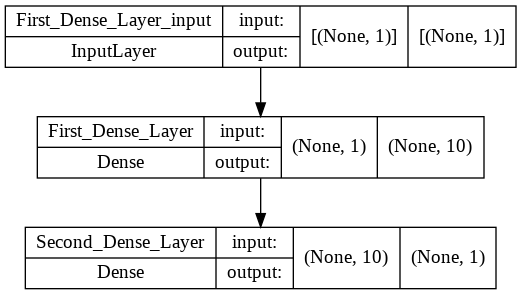

In [42]:
plot_model(model=model_2,show_shapes='True')

Predct and plot the predictions.

In [43]:
y_predict_2=model_2.predict(X_test)

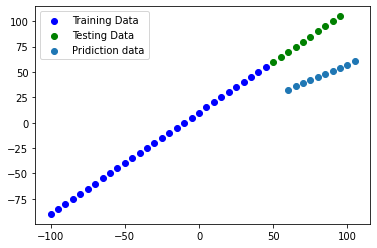

In [44]:
plot_prediction_graph(X_train,X_test,y_train,y_test,y_predict_2)

In [45]:
mae_2=evaluation(y_test,y_predict_2,"mae")

In [46]:
mse_2=evaluation(y_test,y_predict_2,"mse")

Third try with model_3 with 2 Dense layers with 10 units and 500 epochs.

In [47]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,)

Epoch 1/500
1/1 [==============================] - 1s 643ms/step - loss: 24.1219 - mse: 792.9432
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 34.2155 - mse: 1756.2391
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 29.9081 - mse: 1231.4382
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 14.4486 - mse: 257.9333
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 20.8533 - mse: 587.7953
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 17.6748 - mse: 443.8245
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 20.6085 - mse: 573.8275
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 13.8896 - mse: 231.2874
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 17.2076 - mse: 396.6920
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 15.0397 - mse: 290.7949
Epoch 11/500
1/1 [==================

In [48]:
y_predict_3=model_3.predict(X_test)
y_predict_3

array([[32.24567 ],
       [35.070984],
       [37.896294],
       [40.721603],
       [43.546917],
       [46.372223],
       [49.197536],
       [52.022846],
       [54.848164],
       [57.673473]], dtype=float32)

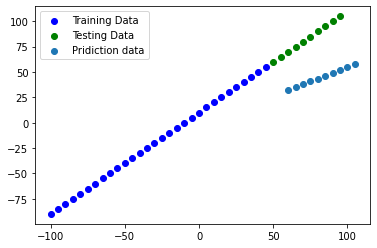

In [49]:
plot_prediction_graph(X_train,X_test,y_train,y_test,y_predict_3)

In [50]:
mse_3=evaluation(y_test,y_predict_3,"mse")

In [51]:
mae_3=evaluation(y_test,y_predict_2,"mae")

**Tracking tensorflow experiment**


In [52]:
import pandas as pd

In [53]:
model_result=[["model_1",mae_1,mse_1],
              ["model_2",mae_2,mse_2],
              ["model_3",mae_3,mse_3]]

In [54]:
all_results=pd.DataFrame(model_result,columns=("Model_Name","Absolute_Error","Square_Error"))

In [55]:
all_results

,Model_Name,Absolute_Error,Square_Error
0,model_1,24.109980,589.813354
1,model_2,35.948433,1322.388916
2,model_3,35.948433,1448.300293


In [56]:
model_1.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [57]:
model_1.save("hdf5format.h5")

**Load the model**

```

```



In [58]:
load_savedFormat_model=tf.keras.models.load_model("best_model_SavedModel_format")

In [59]:
load_savedFormat_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_1.predict(X_test)
load_savedFormat_model.predict(X_test)
load_savedFormat_model.predict(X_test)==model_1.predict(X_test)


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

**Download the model of any fike from Google Colab**


In [61]:
from google.colab import files

In [62]:
files.download("hdf5format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>